In [63]:
import numpy as np
from time import time

### 1 Why not use loop
---

#### 1.1 Arrays are mutable

In [64]:
x_array = np.arange(5)
x_array

array([0, 1, 2, 3, 4])

In [65]:
x_array[0] = 99
x_array

array([99,  1,  2,  3,  4])

In [66]:
x_array[3:6] = [99,99] # this is permissable since the array returned by the slice is of the same shape as the assignment array
x_array

array([99,  1,  2, 99, 99])

#### 1.2 Loops are slow

In [67]:
bigmatrix = np.random.random((1000,2000))
bigmatrix.size

2000000

In [68]:
# A loop based computation of the sum of the max of all rows

def sum_of_max_loop(bigmatrix):
    
    m,n = bigmatrix.shape
    
    maxValues = np.zeros(shape=(m,))
    
    for i in range(m):
        for j in range(n):
            if(bigmatrix[i,j] > maxValues[i]):
                maxValues[i] = bigmatrix[i,j]
    
    sum_of_row_maxes = 0
    for i in range(m):
        sum_of_row_maxes += maxValues[i]
    
    return sum_of_row_maxes

In [69]:
start = time()
sum_of_row_maxes_loop = sum_of_max_loop(bigmatrix=bigmatrix)
duration_loop = time() - start

print(f"sum_of_max_loop = {sum_of_row_maxes_loop}")
print(f"took: {duration_loop:.4f} seconds.")

sum_of_max_loop = 999.4996347327921
took: 0.4007 seconds.


#### 1.3 Vectorized computation

In [70]:
def sum_of_max_vec(bigmatrix):
    maxValues = np.max(bigmatrix, axis=1)
    return sum(maxValues)

In [71]:
start = time()
sum_of_row_maxes_vec = sum_of_max_vec(bigmatrix)
duration_vec = time()-start

print(f"sum_of_max_vec = {sum_of_row_maxes_vec}")
print(f"took: {duration_vec:.4f} seconds")

sum_of_max_vec = 999.4996347327921
took: 0.0028 seconds


In [72]:
print(f"Therefore vectorized computation is roughly {duration_loop/duration_vec} times faster")

Therefore vectorized computation is roughly 141.77612821594263 times faster


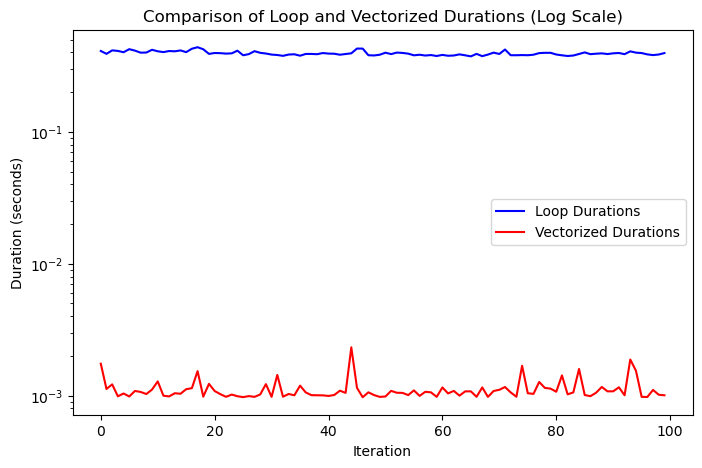

In [73]:
import matplotlib.pyplot as plt

x = np.arange(start=0, stop=100, step=1)
loop_durations = np.zeros_like(x, dtype=float)
vec_durations = np.zeros_like(x, dtype=float)


for i in range(100):
    
    start = time()
    sum_of_max_loop(bigmatrix)
    duration_loop = time() - start
    loop_durations[i] = duration_loop #round(duration_loop, ndigits=4)
    
    start = time()
    sum_of_max_vec(bigmatrix)
    duration_vec = time() - start
    vec_durations[i] = duration_vec #round(duration_vec, ndigits=4)

plt.figure(figsize=(8, 5))
plt.plot(x, loop_durations, label="Loop Durations", color='blue')
plt.plot(x, vec_durations, label="Vectorized Durations", color='red')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Duration (seconds)')
plt.title('Comparison of Loop and Vectorized Durations (Log Scale)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

- values closer to 0 appear appear on the plot as increasingly negative powers of 10
    - log_10(0.1) = -1 so the plot would label this value 10^-1
    - log_10(0.01) = -2 so the plot would label this value 10^-2
    - etc...

### 2 UFunc: Universal Functions
---

#### 2.1 Unary ufunc

- ufuncs are applied to the *entire* array efficiently utilizing highly optimized low level execution plans
- a unary function is a function with a single input
- when applied to a multidimensional numpy array, all elements are mapped to an output array organized in the same shape as the input array

In [74]:
# arbitrarily shaped ndarray

x = np.random.uniform(-100, 100, (3,2,2))
x = x.round(2)
print(f"{x}\n\nshape = {x.shape}")

[[[-98.09 -51.82]
  [-46.07 -39.51]]

 [[ 78.6   -9.78]
  [ -2.72 -50.19]]

 [[ 31.41 -87.71]
  [ 79.38 -30.45]]]

shape = (3, 2, 2)


In [75]:
np.abs(x)

array([[[98.09, 51.82],
        [46.07, 39.51]],

       [[78.6 ,  9.78],
        [ 2.72, 50.19]],

       [[31.41, 87.71],
        [79.38, 30.45]]])

In [76]:
x / 100

array([[[-0.9809, -0.5182],
        [-0.4607, -0.3951]],

       [[ 0.786 , -0.0978],
        [-0.0272, -0.5019]],

       [[ 0.3141, -0.8771],
        [ 0.7938, -0.3045]]])

In [77]:
1/x

array([[[-0.01019472, -0.01929757],
        [-0.0217061 , -0.02531005]],

       [[ 0.01272265, -0.10224949],
        [-0.36764706, -0.01992429]],

       [[ 0.03183699, -0.01140121],
        [ 0.01259763, -0.03284072]]])

In [78]:
x / 100 * 2 * np.pi

array([[[-6.16317647, -3.25594663],
        [-2.89466347, -2.48248651]],

       [[ 4.93858365, -0.61449552],
        [-0.17090264, -3.15353071]],

       [[ 1.9735485 , -5.51098183],
        [ 4.9875925 , -1.91322993]]])

In [79]:
np.sin(x)

array([[[ 0.64469768, -0.9998675 ],
        [-0.86935211, -0.97131614]],

       [[-0.06014734,  0.34779855],
        [-0.40921417,  0.0754108 ]],

       [[-0.0059265 ,  0.25185281],
        [-0.74476569,  0.82257615]]])

In [80]:
np.power(x,2)

array([[[9.6216481e+03, 2.6853124e+03],
        [2.1224449e+03, 1.5610401e+03]],

       [[6.1779600e+03, 9.5648400e+01],
        [7.3984000e+00, 2.5190361e+03]],

       [[9.8658810e+02, 7.6930441e+03],
        [6.3011844e+03, 9.2720250e+02]]])

### 2.2 Binary ufunc
---

- binary ufunc processes two arrays A and B in their entirety
- input arrays must have the same or boradcast-compatible shapes
- the output array has the same (post-broadcast if applicable) shape as the input arrays
- each element in the output array is calculated using pairs of corresponding elements in the input arrays

In [81]:
A = np.arange(1, 1+12).reshape(3,4)
B = np.arange(10, 10+12).reshape(3,4) # this is a good way to ensure each array will have +# elements

print("A =\n", A)
print("B =\n", B)

A =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
B =
 [[10 11 12 13]
 [14 15 16 17]
 [18 19 20 21]]


In [82]:
print("A + B = \n", A+B)
print("B / A = \n", B/A)
print("B / A (using np.divide) = \n", np.divide(B,A))
print("B // A =\n", B // A)
print("B // A (using np.floor_divide) = \n", np.floor_divide(B,A))
print("B ** A =\n", B ** A)
print("B ** A (using np.power) =\n", np.power(B,A))

A + B = 
 [[11 13 15 17]
 [19 21 23 25]
 [27 29 31 33]]
B / A = 
 [[10.          5.5         4.          3.25      ]
 [ 2.8         2.5         2.28571429  2.125     ]
 [ 2.          1.9         1.81818182  1.75      ]]
B / A (using np.divide) = 
 [[10.          5.5         4.          3.25      ]
 [ 2.8         2.5         2.28571429  2.125     ]
 [ 2.          1.9         1.81818182  1.75      ]]
B // A =
 [[10  5  4  3]
 [ 2  2  2  2]
 [ 2  1  1  1]]
B // A (using np.floor_divide) = 
 [[10  5  4  3]
 [ 2  2  2  2]
 [ 2  1  1  1]]
B ** A =
 [[              10              121             1728            28561]
 [          537824         11390625        268435456       6975757441]
 [    198359290368    6131066257801  204800000000000 7355827511386641]]
B ** A (using np.power) =
 [[              10              121             1728            28561]
 [          537824         11390625        268435456       6975757441]
 [    198359290368    6131066257801  204800000000000 735582751138664

### 2.3 Broadcasting
---

- if $A.shape \neq B.shape$
    1. runtime error

    2. **manually** adjust the shape using `np.reshape` or `np.repeat`
    
    3. **broadcasting** is applied using the following rules:
    
        - any axis of size 1 will automatically be repeated so that shapes match
    
        - if `len(A.shape)` $\neq$ `len(B.shape)` then np.newaxis will be used to add a new axis that will then be repeated using np.repeat

            - np.newaxis will only ***append*** new axes so all trailing dimensions must match 

In [83]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [84]:
B = np.array([10,20,30,40])

In [85]:
A + B

array([[11, 22, 33, 44],
       [15, 26, 37, 48],
       [19, 30, 41, 52]])

In [86]:
# first np.newaxis was automatically invoked to increase the dimension of B by 1
B[np.newaxis,:]
# since B.shape[axis = 1] == A.shape[axis = 1], np.repeat is used to set B.shape[axis=0] = A.shape[axis=0]
np.repeat(B[np.newaxis,:],3,axis=0)
# B has now been broadcasted appropriately allowing for the addition A + B to be possible
# A + np.repeat(B[np.newaxis,:],3,axis=0)

array([[10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40]])